# Final Project

## Reading in Libraries and creating df 

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
cwd = os.getcwd()
print("Current Directory:", cwd)

Current Directory: /home/apv47


In [4]:
df = pd.read_csv("/home/apv47/cs210/Spotify_Dataset_V3.csv", delimiter=';')
#df = pd.read_csv("/home/yja11/Spotify_Dataset_V3.csv", delimiter=';')

In [5]:
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


## Step One: Preprocessing 

In [6]:
from sklearn.preprocessing import OneHotEncoder

df['Year'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.year
df_2021 = df[df['Date'] == "15/05/2021"]

df_2021 = df_2021.groupby(['Title', 'Year']).agg({
    'Rank': 'min',  
    'Danceability': 'mean', 
    'Energy': 'mean',
    'Loudness': 'mean',
    'Speechiness': 'mean',
    'Acousticness': 'mean',
    'Instrumentalness': 'mean',
    'Valence': 'mean',
    'Points (Total)': 'mean',
    'Points (Ind for each Artist/Nat)': 'mean',
    'Artists': lambda x: ', '.join(set(x)), 
    'Nationality': lambda x: ', '.join(set(x)),  
    'Continent': lambda x: ', '.join(set(x))  
}).reset_index()

df_2021 = df_2021.dropna()
df_2021 = df_2021.drop(columns=['Points (Total)'])
df_2021 = df_2021.drop_duplicates()

for col in ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']:
    Q1 = df_2021[col].quantile(0.25)
    Q3 = df_2021[col].quantile(0.75)
    IQR = Q3 - Q1
    df_2021 = df_2021[(df_2021[col] >= (Q1 - 1.5 * IQR)) & (df_2021[col] <= (Q3 + 1.5 * IQR))]
df_2021_sorted = df_2021.sort_values(by='Rank', ascending=True)
df_2021_sorted

df_2022 = df[df['Date'] == "15/05/2022"]

df_2022 = df_2022.groupby(['Title', 'Year']).agg({
    'Rank': 'min',  
    'Danceability': 'mean', 
    'Energy': 'mean',
    'Loudness': 'mean',
    'Speechiness': 'mean',
    'Acousticness': 'mean',
    'Instrumentalness': 'mean',
    'Valence': 'mean',
    'Points (Total)': 'mean',
    'Points (Ind for each Artist/Nat)': 'mean',
    'Artists': lambda x: ', '.join(set(x)), 
    'Nationality': lambda x: ', '.join(set(x)),  
    'Continent': lambda x: ', '.join(set(x))  
}).reset_index()

df_2022 = df_2022.dropna()
df_2022 = df_2022.drop(columns=['Points (Total)'])
df_2022 = df_2022.drop_duplicates()

for col in ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']:
    Q1 = df_2022[col].quantile(0.25)
    Q3 = df_2022[col].quantile(0.75)
    IQR = Q3 - Q1
    df_2022 = df_2022[(df_2022[col] >= (Q1 - 1.5 * IQR)) & (df_2022[col] <= (Q3 + 1.5 * IQR))]
df_2022_sorted = df_2022.sort_values(by='Rank', ascending=True)
df_2022_sorted

df_2020 = df[df['Date'] == "15/05/2020"]

df_2020 = df_2020.groupby(['Title', 'Year']).agg({
    'Rank': 'min',  
    'Danceability': 'mean', 
    'Energy': 'mean',
    'Loudness': 'mean',
    'Speechiness': 'mean',
    'Acousticness': 'mean',
    'Instrumentalness': 'mean',
    'Valence': 'mean',
    'Points (Total)': 'mean',
    'Points (Ind for each Artist/Nat)': 'mean',
    'Artists': lambda x: ', '.join(set(x)), 
    'Nationality': lambda x: ', '.join(set(x)),  
    'Continent': lambda x: ', '.join(set(x))  
}).reset_index()

df_2020 = df_2020.dropna()
df_2020 = df_2020.drop(columns=['Points (Total)'])
df_2020 = df_2020.drop_duplicates()

for col in ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']:
    Q1 = df_2020[col].quantile(0.25)
    Q3 = df_2020[col].quantile(0.75)
    IQR = Q3 - Q1
    df_2020 = df_2020[(df_2020[col] >= (Q1 - 1.5 * IQR)) & (df_2020[col] <= (Q3 + 1.5 * IQR))]
df_2020_sorted = df_2020.sort_values(by='Rank', ascending=True)
df_2020_sorted

,Title,Year,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Ind for each Artist/Nat),Artists,Nationality,Continent
26,Blinding Lights,2020,1,0.514,0.730,-5934.00,0.060,0.001,0.0,0.334,200.0,The Weeknd,Canada,Anglo-America
124,ROCKSTAR (feat. Roddy Ricch),2020,2,0.746,0.690,-7956.00,0.164,0.247,0.0,0.497,199.0,DaBaby,United States,Anglo-America
169,Toosie Slide,2020,4,0.830,0.490,-8.82,0.209,0.289,0.0,0.845,197.0,Drake,Canada,Anglo-America
54,GOOBA,2020,5,0.611,0.688,-5688.00,0.341,0.026,0.0,0.393,196.0,6ix9ine,United States,Anglo-America
162,THE SCOTTS,2020,6,0.716,0.537,-7648.00,0.051,0.233,0.0,0.280,65.0,"THE SCOTTS, Travis Scott, Kid Cudi",United States,Anglo-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,BUTTERFLY EFFECT,2020,195,0.764,0.628,-5851.00,0.050,0.053,0.0,0.196,6.0,Travis Scott,United States,Anglo-America
98,Make You Mine,2020,196,0.606,0.799,-4452.00,0.026,0.013,0.0,0.638,5.0,PUBLIC,United States,Anglo-America
197,"thank u, next",2020,198,0.717,0.653,-5634.00,0.066,0.229,0.0,0.412,3.0,Ariana Grande,United States,Anglo-America
70,I Like Me Better,2020,199,0.752,0.505,-7621.00,0.253,0.535,0.0,0.419,2.0,Lauv,United States,Anglo-America


In [7]:
df_2021_sorted.to_csv('/home/apv47/songs_2021.csv', index=False)
df_2022_sorted.to_csv('/home/apv47/songs_2022.csv', index=False)

## Step 2: Visualizations


In [ ]:
# looking at correlations
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Rank','Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
sample = df_2021_sorted[numerical_features].head(10)


corr_matrix = sample.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap (2021)')
plt.show()

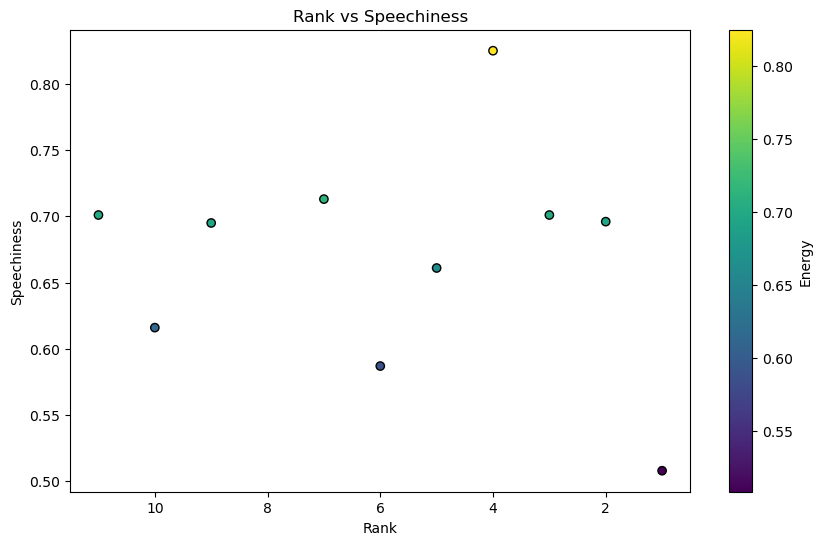

In [9]:
# looking at rank vs. speechiness
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample['Rank'], 
    sample['Energy'], 
    c=sample['Energy'], 
    cmap='viridis', 
    edgecolor='k'
)

plt.title('Rank vs Speechiness')
plt.xlabel('Rank')
plt.ylabel('Speechiness')
plt.gca().invert_xaxis()  

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.show()

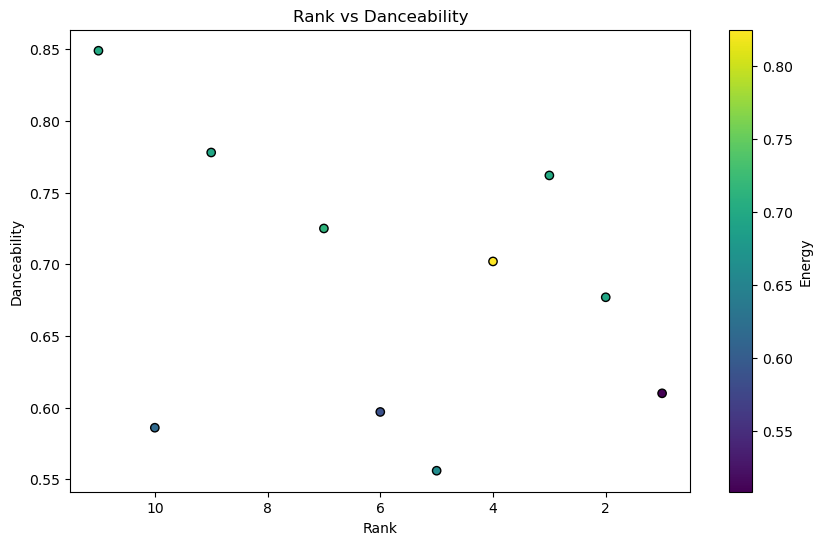

In [10]:
# looking at rank vs. danceability
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample['Rank'], 
    sample['Danceability'], 
    c=sample['Energy'], 
    cmap='viridis', 
    edgecolor='k'
)

plt.title('Rank vs Danceability')
plt.xlabel('Rank')
plt.ylabel('Danceability')
plt.gca().invert_xaxis()  

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.show()

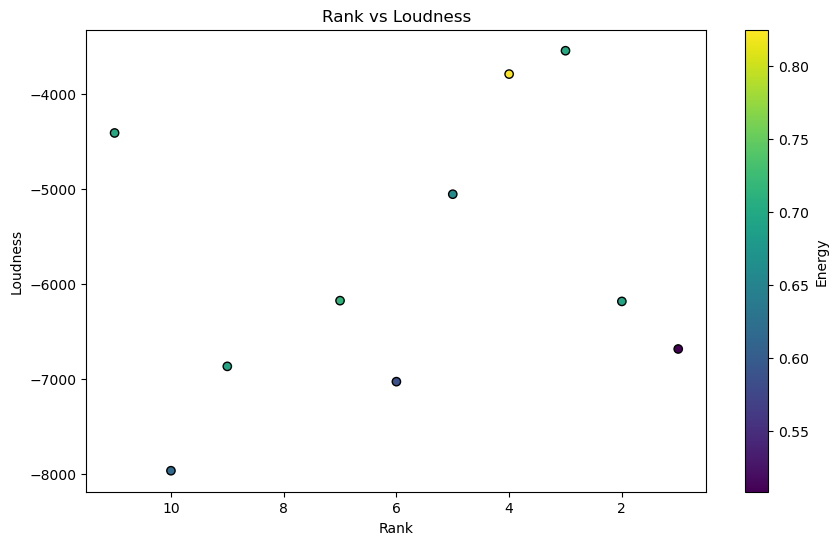

In [11]:
# looking at rank vs. loudiness
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample['Rank'], 
    sample['Loudness'], 
    c=sample['Energy'], 
    cmap='viridis', 
    edgecolor='k'
)

plt.title('Rank vs Loudness')
plt.xlabel('Rank')
plt.ylabel('Loudness')
plt.gca().invert_xaxis()  

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.show()

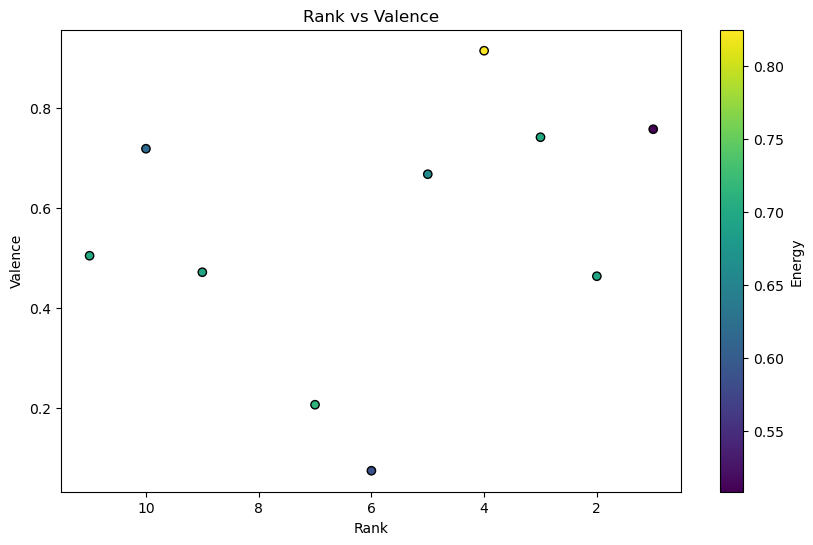

In [12]:
# looking at rank vs. Valence
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample['Rank'], 
    sample['Valence'], 
    c=sample['Energy'], 
    cmap='viridis', 
    edgecolor='k'
)

plt.title('Rank vs Valence')
plt.xlabel('Rank')
plt.ylabel('Valence')
plt.gca().invert_xaxis()  

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.show()

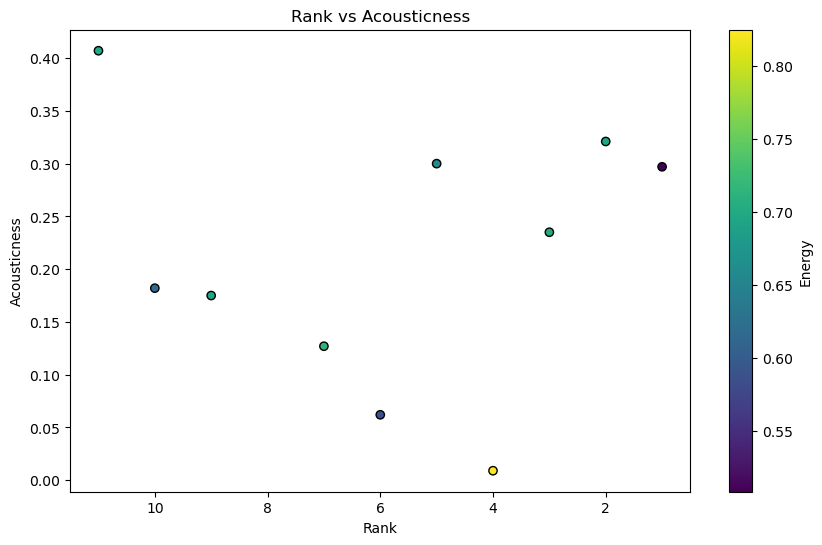

In [13]:
# looking at rank vs. Acousticness
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample['Rank'], 
    sample['Acousticness'], 
    c=sample['Energy'], 
    cmap='viridis', 
    edgecolor='k'
)

plt.title('Rank vs Acousticness')
plt.xlabel('Rank')
plt.ylabel('Acousticness')
plt.gca().invert_xaxis()  

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.show()

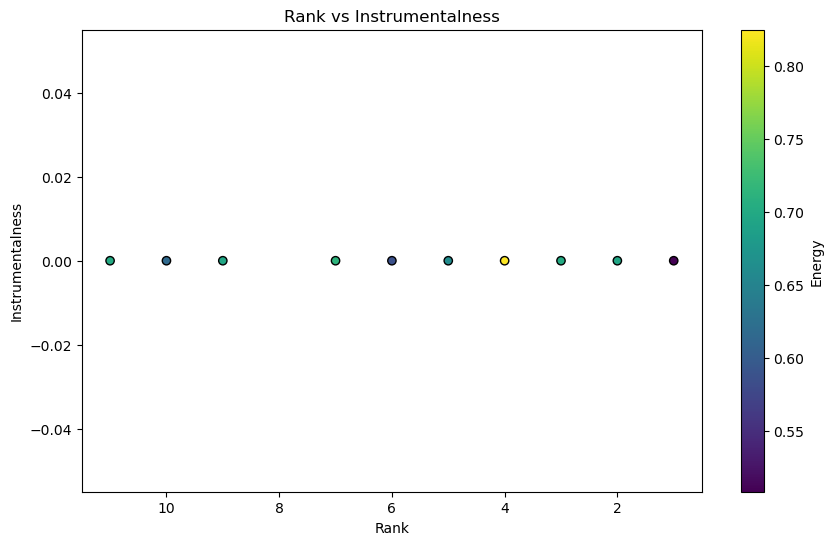

In [14]:
# looking at rank vs. Instrumentalness
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample['Rank'], 
    sample['Instrumentalness'], 
    c=sample['Energy'], 
    cmap='viridis', 
    edgecolor='k'
)

plt.title('Rank vs Instrumentalness')
plt.xlabel('Rank')
plt.ylabel('Instrumentalness')
plt.gca().invert_xaxis()  

cbar = plt.colorbar(scatter)
cbar.set_label('Energy')

plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

scaler = MinMaxScaler()

numeric_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence']

df_2021[numeric_columns] = scaler.fit_transform(df_2021[numeric_columns])
df_2022[numeric_columns] = scaler.transform(df_2022[numeric_columns])


X_2021 = df_2021[numeric_columns]  # Use only numeric columns for features
y_2021 = df_2021['Rank']  # Define the target column for 2021

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_2021, y_2021)

y_pred_2021 = model.predict(X_2021)  # Predicted ranks for 2021

mse_2021 = mean_squared_error(y_2021, y_pred_2021)

r2_2021 = r2_score(y_2021, y_pred_2021)

print("\nModel Evaluation for 2021:")
print(f"Mean Squared Error (MSE): {mse_2021}")
print(f"R-squared (R²): {r2_2021}")

X_2022 = df_2022[numeric_columns]  # Features for 2022 data (numeric columns)
predictions_2022 = model.predict(X_2022)

df_2022['Predictions'] = predictions_2022

mse_2022 = mean_squared_error(df_2022['Rank'], predictions_2022) 
r2_2022 = r2_score(df_2022['Rank'], predictions_2022) 

print("\nModel Evaluation for 2022:")
print(f"Mean Squared Error (MSE): {mse_2022}")
print(f"R-squared (R²): {r2_2022}")


X_2020 = df_2020[numeric_columns]  # Features for 2022 data (numeric columns)
predictions_2020 = model.predict(X_2020)

df_2020['Predictions'] = predictions_2020


mse_2020 = mean_squared_error(df_2020['Rank'], predictions_2020) 
r2_2020 = r2_score(df_2020['Rank'], predictions_2020) 

print("\nModel Evaluation for 2020:")
print(f"Mean Squared Error (MSE): {mse_2020}")
print(f"R-squared (R²): {r2_2020}")


Model Evaluation for 2021:
Mean Squared Error (MSE): 415.6284818187361
R-squared (R²): 0.880996350545582

Model Evaluation for 2022:
Mean Squared Error (MSE): 3754.8461573174186
R-squared (R²): -0.2554704064656965

Model Evaluation for 2020:
Mean Squared Error (MSE): 5001.623372824002
R-squared (R²): -0.5770602244509919


In [17]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({
    'Feature': numeric_columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(features_df)


Feature Importances:
        Feature  Importance
1        Energy    0.232674
0  Danceability    0.182911
3   Speechiness    0.166887
2      Loudness    0.156261
5       Valence    0.140253
4  Acousticness    0.121013
